## Tic-Tac-Toe Agent
​
In this notebook, you will learn to build an RL agent (using Q-learning) that learns to play Numerical Tic-Tac-Toe with odd numbers. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. The following is the layout of the notebook:
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values

#### Importing libraries

In [1]:
from TCGame_Env import TicTacToe# from <TC_Env> import <TicTacToe> - import your class from environment file
import collections
import numpy as np
import random
import pickle
import time
from matplotlib import pyplot as plt

In [2]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [3]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):

    valid_Actions = []
    
    valid_Actions = [i for i in env.action_space(state)[0]] ###### -------please call your environment as env
    return valid_Actions

In [4]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state1 = Q_state(state)
    
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys():
        for action in valid_act:
            Q_dict[state1][action]=0

#### Epsilon-greedy strategy - Write your code here

(you can build your epsilon-decay function similar to the one given at the end of the notebook)

In [5]:
# Defining epsilon-greedy policy. You can choose any function epsilon-decay strategy
def epsilon_greedy(state, time):

    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*time)
    # print(epsilon)
    z = np.random.random()
        
    if z > epsilon:
        #"Exploitation"
        state_1 = Q_state(state)
        action = max(Q_dict[state_1],key=Q_dict[state_1].get)   #Exploitation: this gets the action corresponding to max q-value of current state
    else:
        #"Exploration"
        actions_allowed = [i for i in env.action_space(state)[0]]        
        action = actions_allowed[np.random.choice(range(len(actions_allowed)))]    #Exploration: randomly choosing and action
    
    return action




#### Tracking the state-action pairs for checking convergence - write your code here

In [6]:
# Initialise Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence)
Q_dict = collections.defaultdict(dict)
States_track =collections.defaultdict(dict)

print(len(Q_dict))
print(len(States_track))

0
0


In [7]:
# Initialise states to be tracked
def initialise_tracking_states():
    
    sample_q_values = [('x-4-x-x-x-9-3-x-2',(2,7)),('x-x-x-x-x-x-x-x-x',(0,7)),
                       ('x-4-5-3-8-x-x-x-x',(5,9)),('x-x-x-x-4-3-x-2-1',(3,9)),
                      ('x-x-x-x-x-x-x-x-5',(4,2)),('6-x-4-3-x-x-x-5-x',(5,7)),
                      ('x-x-x-x-x-x-x-x-x',(5,1)),('5-4-3-6-1-2-x-8-7',(6,9))]    #select some 8 Q-values
    for q_values in sample_q_values:
        state = q_values[0]
        action = q_values[1]
        States_track[state][action] = [] #this is an array which will have appended values of that state-action pair for every 2000th episode         

In [8]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [9]:
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])

In [10]:
initialise_tracking_states()

#### Define hyperparameters  ---write your code here

In [11]:
#Defining parameters for the training

EPISODES = 2000000
#EPISODES = 100000
LR = 0.01                   # learning rate
GAMMA = 0.91                # discount factor

max_epsilon = 1.0
min_epsilon = 0.001
decay_rate = 0.000001       # epsilon decay rate
#decay_rate = 0.0001
threshold = 1000       # no of episodes after which states_tracked wwill be saved
policy_threshold = 1000   # no of episodes after which Q dictionary/table will be saved

### Q-update loop ---write your code here

In [12]:
start_time = time.time()

for episode in range(EPISODES):
    ##### Start writing your code from the next line
    env = TicTacToe() # call the environment
    curr_state = env.state    
    completed = False  
    add_to_dict(curr_state)  # adding the current state to dictionary
    
    if episode%20000==1:
        print('Episodes Completed: ',episode-1)

    while completed != True:  
        curr_Q_state = Q_state(curr_state)
        curr_action = epsilon_greedy(curr_state, episode)   # applying epislon
        next_state, reward, completed = env.step(curr_state, curr_action) # getting rewards
        next_state_interim = Q_state(next_state)
        add_to_dict(next_state)

        # Update rules
        if completed != True:
            max_next = max(Q_dict[next_state_interim],key=Q_dict[next_state_interim].get)  
                #this gets the action corresponding to max q-value of next state
            Q_dict[curr_Q_state][curr_action] += LR * ((reward + (GAMMA*(Q_dict[next_state_interim][max_next])))
                                                      - Q_dict[curr_Q_state][curr_action] ) 
        else:
            Q_dict[curr_Q_state][curr_action] += LR * ((reward - Q_dict[curr_Q_state][curr_action]))

        # move to next state
        curr_state = next_state
        
     #save tracking states  
    if ((episode+1)%threshold)==0:
        save_tracking_states()
        save_obj(States_track,'States_tracking')

    if ((episode+1)% policy_threshold) == 0:
        save_obj(Q_dict,'Policy_Q_dict')  
    
elapsed_time = time.time() - start_time
print('Time elapsed for execution: ',elapsed_time)
save_obj(States_track,'States_tracked')   
save_obj(Q_dict,'Policy')

Episodes Completed:  0
Episodes Completed:  20000
Episodes Completed:  40000
Episodes Completed:  60000
Episodes Completed:  80000
Episodes Completed:  100000
Episodes Completed:  120000
Episodes Completed:  140000
Episodes Completed:  160000
Episodes Completed:  180000
Episodes Completed:  200000
Episodes Completed:  220000
Episodes Completed:  240000
Episodes Completed:  260000
Episodes Completed:  280000
Episodes Completed:  300000
Episodes Completed:  320000
Episodes Completed:  340000
Episodes Completed:  360000
Episodes Completed:  380000
Episodes Completed:  400000
Episodes Completed:  420000
Episodes Completed:  440000
Episodes Completed:  460000
Episodes Completed:  480000
Episodes Completed:  500000
Episodes Completed:  520000
Episodes Completed:  540000
Episodes Completed:  560000
Episodes Completed:  580000
Episodes Completed:  600000
Episodes Completed:  620000
Episodes Completed:  640000
Episodes Completed:  660000
Episodes Completed:  680000
Episodes Completed:  700000
E

#### Check the Q-dictionary

In [13]:
Q_dict

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(0, 1): -1.3612639014010708,
              (0, 3): -1.2977615098616173,
              (0, 5): -1.357242398678025,
              (0, 7): -1.3608361033383884,
              (0, 9): -1.330266298060139,
              (1, 1): -1.355615714457628,
              (1, 3): -0.6101245053550566,
              (1, 5): -1.3476749466064823,
              (1, 7): -1.3604384926081228,
              (1, 9): -1.3578059507093683,
              (2, 1): -1.3563431666275687,
              (2, 3): -1.3542788498336302,
              (2, 5): -1.3597685098726975,
              (2, 7): 4.3562037132261855,
              (2, 9): -1.3496949433432328,
              (3, 1): -1.3591156134077298,
              (3, 3): -1.351913993004491,
              (3, 5): -1.350616887800567,
              (3, 7): -1.3587988738937735,
              (3, 9): -1.3560701065331198,
              (4, 1): -1.3611717268563046,
              (4, 3): -1.364198904014526,
              (4, 5): 

In [14]:
len(Q_dict)

2159866

#### Check the states tracked for Q-values convergence
(non-evaluative)

In [15]:
# Write the code for plotting the graphs for state-action pairs tracked

<function matplotlib.pyplot.show(*args, **kw)>

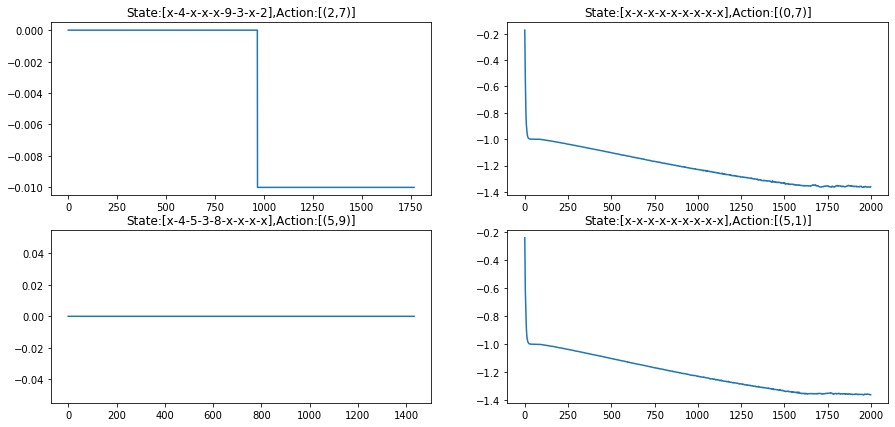

In [16]:
plt.figure(0, figsize=(15,7))

x_axis = np.asarray(range(0, len(States_track['x-4-x-x-x-9-3-x-2'][(2,7)])))
plt.subplot(221)
plt.title('State:[x-4-x-x-x-9-3-x-2],Action:[(2,7)]')
plt.plot(x_axis,np.asarray(States_track['x-4-x-x-x-9-3-x-2'][(2,7)]))
plt.show

x_axis = np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(0,7)])))
plt.subplot(222)
plt.title('State:[x-x-x-x-x-x-x-x-x],Action:[(0,7)]')
plt.plot(x_axis,np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(0,7)]))
plt.show

x_axis = np.asarray(range(0, len(States_track['x-4-5-3-8-x-x-x-x'][(5,9)])))
plt.subplot(223)
plt.title('State:[x-4-5-3-8-x-x-x-x],Action:[(5,9)]')
plt.plot(x_axis,np.asarray(States_track['x-4-5-3-8-x-x-x-x'][(5,9)]))
plt.show


x_axis = np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(5,1)])))
plt.subplot(224)
plt.title('State:[x-x-x-x-x-x-x-x-x],Action:[(5,1)]')
plt.plot(x_axis,np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(5,1)]))
plt.show




### Epsilon - decay check

In [17]:
EPISODES = 2000000
max_epsilon = 1.0
min_epsilon = 0.001
time = np.arange(0,EPISODES)
epsilon = []
for i in range(0,EPISODES):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*i))

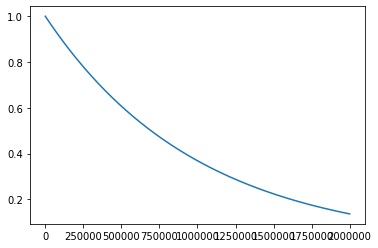

In [18]:
plt.plot(time, epsilon)
plt.show()